<a href="https://colab.research.google.com/github/MariaMaj59/neirons-learn/blob/main/3_CNN_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.datasets import cifar10, cifar100 # датасет 32*32 px (1-22-46)
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from keras.preprocessing import image # для отрисовки изображения
from keras.optimizers import Adam, Adadelta
from keras import utils
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os
from google.colab import drive

%matplotlib inline

In [ ]:
# Загружаем данные
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Определяем названия классов
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик'] 

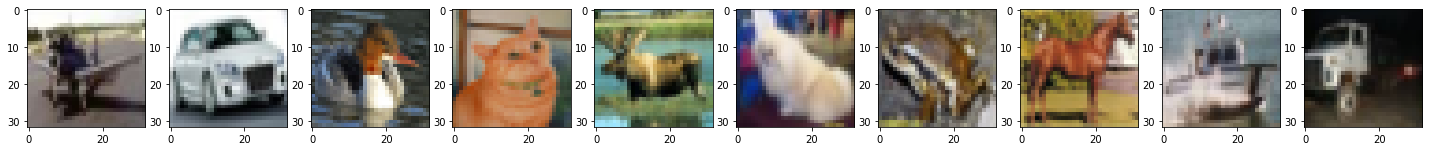

In [ ]:
# Выводим для примера картинки по каждому классу
fig, axs = plt.subplots(1, 10, figsize=(25, 3))

for i in range(10): # количество циклов соответствует количеству возвожныех ответов
    label_index = np.where(y_train == i)[0]
    index = random.choice(label_index)
    img = x_train[index]
    axs[i].imshow(Image.fromarray(img))

# В среде на пк может понадобиться команда plt.show()

In [ ]:
# Превращаем y в формат to hot encoring
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [ ]:
# НЕЙРОННАЯ СЕТЬ

# задаем batch_size
batch_size = 128
model = Sequential()

model.add(BatchNormalization(input_shape=(32, 32, 3)))                # слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))  # сверточный слой
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                             # слой подвыборки
model.add(Dropout(0.25))                                              # слой регуляризации

model.add(BatchNormalization())                # слой пакетной нормализации
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))  # сверточный слой
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                             # слой подвыборки
model.add(Dropout(0.25))                                              # слой регуляризации 

model.add(BatchNormalization())                # слой пакетной нормализации
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))  # сверточный слой
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                             # слой подвыборки
model.add(Dropout(0.25))                                              # слой регуляризации 


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax')) # количество выходный нейронов - 10 - равно количеству возможных ответов



In [ ]:
# Компилируем модель:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Обучаем сеть на данных mnist
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=40, validation_data=(x_test, y_test), verbose = 1)

In [ ]:
# Отображаем график точности обучения
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

model.summary() # выводит информацию о модели

In [ ]:
n = 512
prediction=model.predict(x_test)

print('Выход сети:', prediction[n])
print('Распознанный образ:', np.argmax(prediction[n]))
print('Верный ответ:', np.argmax(y_test[n]))
print('Распознанный образна картинке:', classes[np.argmax(prediction[n])])

# Смотрим
plt.imshow(Image.fromarray(x_test[n]).convert('RGBA'))